In [ ]:
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Saving kaggle.json to kaggle.json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedownhill/art-images-drawings-painting-sculpture-engraving

Dataset URL: https://www.kaggle.com/datasets/thedownhill/art-images-drawings-painting-sculpture-engraving
License(s): ODbL-1.0
 99% 577M/583M [00:11<00:00, 62.1MB/s]
100% 583M/583M [00:11<00:00, 53.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip "/content/art-images-drawings-painting-sculpture-engraving.zip" -d '/content/uncompressed'

Streaming output truncated to the last 5000 lines.
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 968 20.26.47.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 969.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 97.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 970.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 971.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 972.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 973.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 974.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_set/sculpture/i - 976.jpeg  
  inflating: /content/uncompressed/dataset/dataset_updated/training_

In [ ]:
data_dir = '/content/uncompressed/dataset/dataset_updated/training_set'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/uncompressed/dataset/dataset_updated/training_set')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/iconography/434.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/iconography/613.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/iconography/198.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/iconography/323.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/iconography/628.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('drawings/*.jpg')))
print(image_count)

48


In [ ]:
drawings = list(data_dir.glob('drawings/*'))
print(drawings[:5])

[PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 784.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 400.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/images.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 952.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 122.jpeg')]


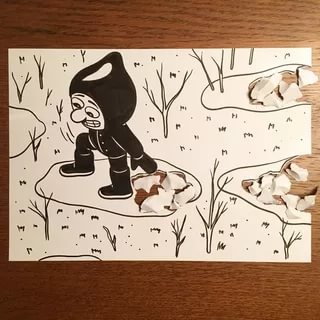

In [ ]:
PIL.Image.open(str(drawings[15]))

In [ ]:
training_image_dict =  {
    'drawings' : list(data_dir.glob('drawings/*')),
    'engraving' : list(data_dir.glob('engraving/*')),
    'iconography' : list(data_dir.glob('iconography/*')),
    'painting' : list(data_dir.glob('painting/*')),
    'sculpture' : list(data_dir.glob('sculpture/*')),
}

In [ ]:
training_lablel_dict = {
    'drawings' : 0,
    'engraving' : 1,
    'iconography' : 2,
    'painting' : 3,
    'sculpture' : 4,
}

In [ ]:
training_image_dict['drawings'][:5]

[PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 784.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 400.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/images.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 952.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/training_set/drawings/i - 122.jpeg')]

In [ ]:

x, y = [], []
for training_name, images in training_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img, (100, 100))
            x.append(resized_img)
            y.append(training_lablel_dict[training_name])
        else:
            print(f"Failed to load image: {image}")

Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/engraving/356.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/engraving/304.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/engraving/249.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/iconography/331.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/iconography/69.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/painting/0175.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/painting/1450.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/painting/0775.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/painting/0325.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/training_set/painting/1300.jpg
Failed 

In [ ]:

x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
num_classes = 5

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


181/181 [==============================] - 32s 173ms/step - loss: 0.8431 - accuracy: 0.6788
Epoch 2/10
181/181 [==============================] - 30s 167ms/step - loss: 0.5621 - accuracy: 0.7981
Epoch 3/10
181/181 [==============================] - 31s 172ms/step - loss: 0.4678 - accuracy: 0.8254
Epoch 4/10
181/181 [==============================] - 30s 166ms/step - loss: 0.3701 - accuracy: 0.8637
Epoch 5/10
181/181 [==============================] - 31s 172ms/step - loss: 0.3077 - accuracy: 0.8841
Epoch 6/10
181/181 [==============================] - 32s 174ms/step - loss: 0.2536 - accuracy: 0.9074
Epoch 7/10
181/181 [==============================] - 30s 166ms/step - loss: 0.1674 - accuracy: 0.9399
Epoch 8/10
181/181 [==============================] - 31s 172ms/step - loss: 0.1163 - accuracy: 0.9610
Epoch 9/10
181/181 [==============================] - 30s 166ms/step - loss: 0.0926 - accuracy: 0.9694
Epoch 10/10
181/181 [==============================] - 30s 166ms/step - loss: 0.0580

In [ ]:
model.evaluate(x_test,y_test)

61/61 [==============================] - 3s 47ms/step - loss: 0.7404 - accuracy: 0.8312


[0.7403697371482849, 0.8311755657196045]

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
    ]
)

In [ ]:

model2 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
181/181 [==============================] - 40s 210ms/step - loss: 0.9659 - accuracy: 0.6231
Epoch 2/20
181/181 [==============================] - 40s 219ms/step - loss: 0.7449 - accuracy: 0.7316
Epoch 3/20
181/181 [==============================] - 39s 218ms/step - loss: 0.6684 - accuracy: 0.7632
Epoch 4/20
181/181 [==============================] - 39s 215ms/step - loss: 0.6200 - accuracy: 0.7791
Epoch 5/20
181/181 [==============================] - 39s 214ms/step - loss: 0.5719 - accuracy: 0.7965
Epoch 6/20
181/181 [==============================] - 39s 214ms/step - loss: 0.5542 - accuracy: 0.7990
Epoch 7/20
181/181 [==============================] - 39s 218ms/step - loss: 0.5275 - accuracy: 0.8083
Epoch 8/20
181/181 [==============================] - 39s 214ms/step - loss: 0.4974 - accuracy: 0.8173
Epoch 9/20
181/181 [==============================] - 39s 217ms/step - loss: 0.4660 - accuracy: 0.8313
Epoch 10/20
181/181 [==============================] - 39s 217ms/step - l

In [ ]:
model2.evaluate(x_test,y_test)

61/61 [==============================] - 4s 56ms/step - loss: 0.5832 - accuracy: 0.7929


[0.5832393169403076, 0.7928534150123596]

In [ ]:
data_dir1 = '/content/uncompressed/dataset/dataset_updated/validation_set'

In [ ]:
import pathlib
data_dir1 = pathlib.Path(data_dir1)
data_dir1

PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set')

In [ ]:
list(data_dir1.glob('*/*.jpg'))[:5]

[PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/iconography/744.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/iconography/521.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/iconography/451.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/iconography/595.jpg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/iconography/301.jpg')]

In [ ]:
image_count = len(list(data_dir1.glob('drawings/*.jpg')))
print(image_count)

5


In [ ]:
drawings = list(data_dir1.glob('drawings/*'))
print(drawings[:5])

[PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 995.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/images (38).jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 1155.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 505.jpeg'), PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 699.jpeg')]


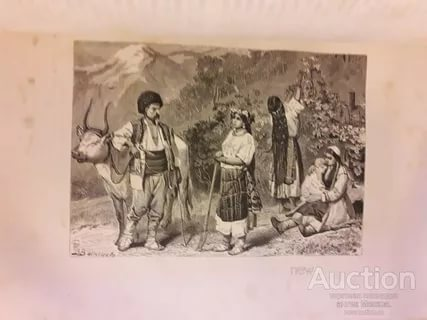

In [ ]:
PIL.Image.open(str(drawings[15]))

In [ ]:
training_image_dict1 =  {
    'drawings' : list(data_dir1.glob('drawings/*')),
    'engraving' : list(data_dir1.glob('engraving/*')),
    'iconography' : list(data_dir1.glob('iconography/*')),
    'painting' : list(data_dir1.glob('painting/*')),
    'sculpture' : list(data_dir1.glob('sculpture/*')),
}

In [ ]:
training_lablel_dict1 = {
    'drawings' : 0,
    'engraving' : 1,
    'iconography' : 2,
    'painting' : 3,
    'sculpture' : 4,
}

In [ ]:
training_image_dict1['drawings'][:5]

[PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 995.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/images (38).jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 1155.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 505.jpeg'),
 PosixPath('/content/uncompressed/dataset/dataset_updated/validation_set/drawings/i - 699.jpeg')]

In [ ]:
x , y =[] , []
for training_name, images in training_image_dict1.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img, (100,100))
            x.append(resized_img)
            y.append(training_lablel_dict[training_name])
        else:
            print(f"Failed to load image: {image}")

Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/1550.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/0300.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/1600.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/1150.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/2200.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/2225.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/1250.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/painting/2275.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/sculpture/170.jpg
Failed to load image: /content/uncompressed/dataset/dataset_updated/validation_set/sculptur

In [ ]:

x = np.array(x)
y = np.array(y)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
num_classes = 5

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255.0
x_test /= 255.0

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 4s 151ms/step - loss: 1.5610 - accuracy: 0.3910
Epoch 2/10
21/21 [==============================] - 4s 168ms/step - loss: 1.0679 - accuracy: 0.5872
Epoch 3/10
21/21 [==============================] - 4s 198ms/step - loss: 0.8736 - accuracy: 0.6791
Epoch 4/10
21/21 [==============================] - 3s 150ms/step - loss: 0.8271 - accuracy: 0.6994
Epoch 5/10
21/21 [==============================] - 3s 151ms/step - loss: 0.6877 - accuracy: 0.7445
Epoch 6/10
21/21 [==============================] - 4s 176ms/step - loss: 0.6710 - accuracy: 0.7632
Epoch 7/10
21/21 [==============================] - 4s 169ms/step - loss: 0.5508 - accuracy: 0.8084
Epoch 8/10
21/21 [==============================] - 3s 150ms/step - loss: 0.4649 - accuracy: 0.8271
Epoch 9/10
21/21 [==============================] - 3s 149ms/step - loss: 0.4064 - accuracy: 0.8505
Epoch 10/10
21/21 [==============================] - 4s 207ms/step - loss: 0.4712 - accuracy: 0.8364


In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 46ms/step - loss: 0.7173 - accuracy: 0.7383


[0.717269241809845, 0.7383177280426025]

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
    ]
)

In [ ]:

model2 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
21/21 [==============================] - 7s 269ms/step - loss: 1.3864 - accuracy: 0.4206
Epoch 2/20
21/21 [==============================] - 4s 213ms/step - loss: 1.1629 - accuracy: 0.5389
Epoch 3/20
21/21 [==============================] - 4s 213ms/step - loss: 1.0634 - accuracy: 0.5950
Epoch 4/20
21/21 [==============================] - 6s 278ms/step - loss: 0.9488 - accuracy: 0.6558
Epoch 5/20
21/21 [==============================] - 4s 212ms/step - loss: 0.8866 - accuracy: 0.6729
Epoch 6/20
21/21 [==============================] - 6s 266ms/step - loss: 0.9298 - accuracy: 0.6511
Epoch 7/20
21/21 [==============================] - 5s 215ms/step - loss: 0.9850 - accuracy: 0.6277
Epoch 8/20
21/21 [==============================] - 4s 211ms/step - loss: 0.8201 - accuracy: 0.7056
Epoch 9/20
21/21 [==============================] - 6s 265ms/step - loss: 0.7687 - accuracy: 0.7227
Epoch 10/20
21/21 [==============================] - 4s 212ms/step - loss: 0.7406 - accuracy: 0.7461

In [ ]:
model2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 54ms/step - loss: 0.8059 - accuracy: 0.7383


[0.8058562874794006, 0.7383177280426025]

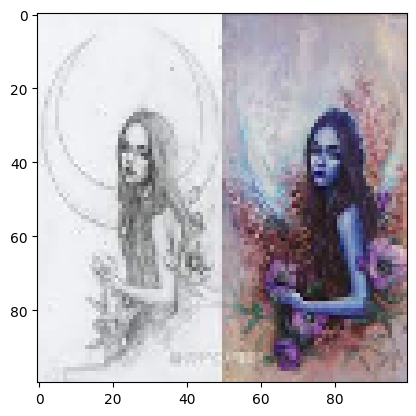

In [ ]:
img= cv2.imread("/content/download.jpg")
rez_img= cv2.resize(img, (100,100))
plt.imshow(rez_img)
plt.show()
rez_img= rez_img.reshape(1,100,100,3)

In [ ]:
model.predict(rez_img)

1/1 [==============================] - 0s 163ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)